<a href="https://colab.research.google.com/github/jumarques03/SERS/blob/main/CP02_002_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1 – Classificação (Solar)
**Título:** Previsão de nível de radiação solar

**Dataset sugerido:** Solar Radiation Prediction Dataset – Kaggle
(https://www.kaggle.com/datasets/dronio/SolarEnergy)

Utilize o dataset de radiação solar para treinar um modelo supervisionado para classificar
períodos em Alta Radiação e Baixa Radiação (crie a variável-alvo a partir de um limiar,
por exemplo, a mediana da radiação). Compare o desempenho de três algoritmos do
Scikit-learn, como Árvore de Decisão, Random Forest e Support Vector Machine
(SVM).

  • Separe dados em treino e teste (70/30).

  • Normalize os atributos contínuos, se necessário.
  
  • Avalie com acurácia e matriz de confusão.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SERS-DATASETS/SolarPrediction.csv', sep = ',')

df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
mediana_radiacao = 2.66

df['Nível de Radiação'] = ['Alta' if valor > mediana_radiacao else 'Baixa' for valor in df['Radiation']]

In [ ]:
df['Data e Hora'] = pd.to_datetime(df['Data'] + ' ' + df['Time'])

df['Hora'] = df['Data e Hora'].dt.hour
df['Minuto'] = df['Data e Hora'].dt.minute

colunas_para_remover = ['UNIXTime', 'Data', 'Time', 'Data e Hora', 'TimeSunRise', 'TimeSunSet']
df = df.drop(colunas_para_remover, axis=1)

df.info()

/tmp/ipython-input-3418130559.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Data e Hora'] = pd.to_datetime(df['Data'] + ' ' + df['Time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   Nível de Radiação       32686 non-null  object 
 7   Hora                    32686 non-null  int32  
 8   Minuto                  32686 non-null  int32  
dtypes: float64(4), int32(2), int64(2), object(1)
memory usage: 2.0+ MB


Métricas do Modelo de Árvore de Decisão:
Acurácia: 0.9709
Matriz de Confusão:


<Axes: >

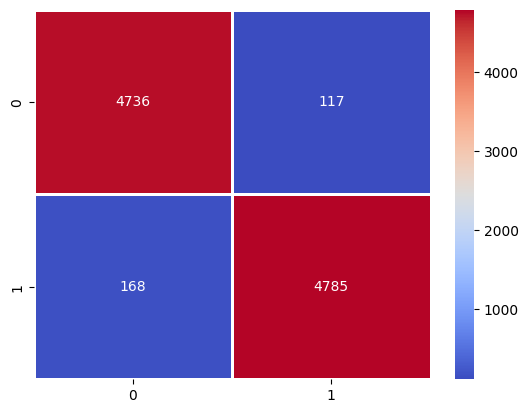

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib as plt

X = df.drop(['Nível de Radiação', 'Radiation'], axis=1)   # Remove a coluna 'Radiation' para não dar as "respostas"

# y é a variável que queremos prever
y = df['Nível de Radiação']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de árvore de regressão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Métricas do Modelo de Árvore de Decisão:")
print(f"Acurácia: {acc:.4f}")  # É a porcentagem de previsões que o modelo acertou.
print("Matriz de Confusão:")
sns.heatmap(cm, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

Métricas do Modelo Random Forest:
Acurácia: 0.9773
Matriz de Confusão:


<Axes: >

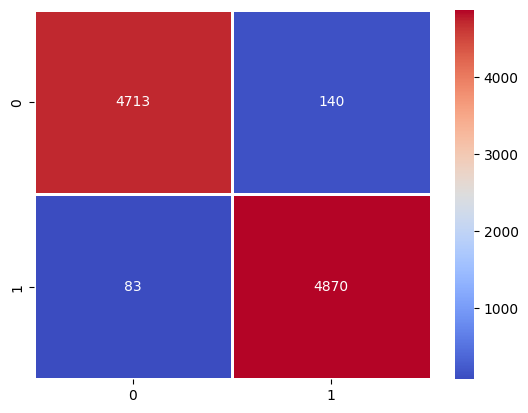

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Nível de Radiação', 'Radiation'], axis=1)   # Remove a coluna 'Radiation' para não dar as "respostas"

# y é a variável que queremos prever
y = df['Nível de Radiação']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Métricas do Modelo Random Forest:")
print(f"Acurácia: {acc:.4f}")  # É a porcentagem de previsões que o modelo acertou.
print("Matriz de Confusão:")
sns.heatmap(cm, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Criar o objeto de normalização
scaler = StandardScaler()

# Aprender a escala APENAS com os dados de treino
scaler.fit(X_train)

# Aplicar a transformação nos dados de treino e de teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Criar o modelo SVM (por padrão, ele já usa o kernel 'rbf')
svm_model = SVC(random_state=42)

# Treinar o modelo
svm_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_svm = svm_model.predict(X_test_scaled)

# Avaliar
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do SVM (com kernel RBF): {acc_svm:.4f}")

# Exercício 2 – Regressão (Eólica)
**Título:** Previsão de potência de turbinas eólicas

**Dataset sugerido:** Wind Turbine Scada Dataset – Kaggle
(https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset)

Com base nos dados de operação de turbinas eólicas (velocidade do vento, ângulo do
rotor, densidade do ar, etc.), treine modelos de regressão para prever a potência gerada
(kW). Compare o desempenho de três algoritmos do Scikit-learn, como Regressão
Linear, Regressão de Árvores e Random Forest Regressor.

• Separe treino e teste (80/20).

• Normalize os dados, se necessário.

• Avalie com RMSE e R²


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SERS-DATASETS/T1.csv', sep = ',')

df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='mixed', dayfirst=True)

df['Hora'] = df['Date/Time'].dt.hour
df['Minuto'] = df['Date/Time'].dt.minute

colunas_para_remover = ['Date/Time']
df = df.drop(colunas_para_remover, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LV ActivePower (kW)            50530 non-null  float64
 1   Wind Speed (m/s)               50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 3   Wind Direction (°)             50530 non-null  float64
 4   Hora                           50530 non-null  int32  
 5   Minuto                         50530 non-null  int32  
dtypes: float64(4), int32(2)
memory usage: 1.9 MB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

X = df.drop('LV ActivePower (kW)',axis=1)
y=df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Métricas do Modelo de Regressão Linear:")
print(f"R²: {r2:.4f}")  # Quanto mais perto de 1, melhor o modelo explica a variabilidade dos dados
print(f"RMSE: {rmse:.4f}") # Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados

Métricas do Modelo de Regressão Linear:
R²: 0.9007
RMSE: 411.6591


In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df.drop('LV ActivePower (kW)',axis=1)
y=df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_train, y_train)


y_pred= modelo.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Métricas do Modelo de Árvore de Decisão:")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Métricas do Modelo de Árvore de Decisão:
R²: 0.8351
RMSE: 530.4610


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('LV ActivePower (kW)',axis=1)
y=df['LV ActivePower (kW)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Métricas do Modelo Random Forest:")
print(f"R²: {r2:.4f}")  # Quanto mais perto de 1, melhor o modelo explica a variabilidade dos dados
print(f"RMSE: {rmse:.4f}") # Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados

Métricas do Modelo Random Forest:
R²: 0.9144
RMSE: 382.2634


***Conclusão:***

O modelo Random Forest Regression apresentou um melhor desempenho comparado com os outros modelos. Com R² de 91,4% e RMSE 328,26 kW, este modelo consegue fazer previsões mais próximas dos valores reais de potência gerada e explicar sua variabilidade.  